In [15]:
import pandas as pd
import numpy as np
import json
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from tensorflow import keras
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report

In [16]:
x_src_path = '../Dataset/assignment1New.json'
y_src_path = '../DataBook/Assignment1_Data_Analyst.xlsx'

In [17]:
data = pd.read_json(x_src_path)

In [18]:
df_supervision = pd.read_excel(y_src_path)
plagiarised_array = df_supervision['Plagiarised'].astype(int).values

In [19]:
X = np.nan_to_num(data.values, nan=0, copy=True).astype(int)
y = plagiarised_array
ros = SMOTE()
X_resampled, y_resampled = ros.fit_resample(X, y)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=3)
#seed 32 results 100% on test score 24

In [21]:
count_0 = 0
count_1 = 0

for element in y_test:
    if element == 0:
        count_0 += 1
    elif element == 1:
        count_1 += 1

print("Number of 0s:", count_0)
print("Number of 1s:", count_1)

Number of 0s: 11
Number of 1s: 15


In [22]:
# for i in range(50):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
#     print("this stage is " + str(i))
#     count_y_train_1 = np.sum(y_train == 1)
#     count_y_test_1 = np.sum(y_test == 1)
#     print(count_y_train_1)
#     print(count_y_test_1)
#     print("")

In [23]:
p = Perceptron()
p.fit(X_train,y_train)

print(f"Training data score: {p.score(X_train, y_train)}")
print(f"Test data score: {p.score(X_test, y_test)}")

Training data score: 1.0
Test data score: 0.8846153846153846


In [24]:
# predictions = p.predict(X_test)
# for i in range(len(X_test)):
#     print("Predicted:", predictions[i], "Actual:", y_test[i])
y_pred = p.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.83      1.00      0.91        15

    accuracy                           0.88        26
   macro avg       0.92      0.86      0.88        26
weighted avg       0.90      0.88      0.88        26



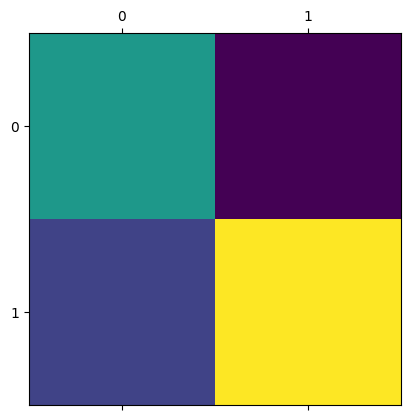

In [25]:
cm = confusion_matrix( p.predict(X_test), y_test)
# plt.set_cmap()
plt.matshow(cm)

In [26]:
modelNames = [
    '1d',
    '2d',
    '3d',
    '4d',
    '5d',
    '6d',
    '7d'
]

NODES_PER_HIDDEN_LAYER = 64

models = [ 

    keras.models.Sequential([
    keras.layers.Input(shape=(33813,)),
    keras.layers.Dense(2, activation='softmax')
]),

    keras.models.Sequential([
    keras.layers.Input(shape=(33813,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
]),

 keras.models.Sequential([
    keras.layers.Input(shape=(33813,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
]),

 keras.models.Sequential([
    keras.layers.Input(shape=(33813,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
]),

 keras.models.Sequential([
    keras.layers.Input(shape=(33813,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
]),

keras.models.Sequential([
    keras.layers.Input(shape=(33813,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
]),

keras.models.Sequential([
    keras.layers.Input(shape=(33813,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

]

In [27]:
LOSS_FN = keras.losses.sparse_categorical_crossentropy

for model in models:
    model.compile(optimizer='adam',loss=LOSS_FN,metrics=['accuracy'])

In [28]:
TRAINING_EPOCHS = 20

# train all models
for model, name in zip(models, modelNames):
    print(f'training model {name}')
    model.fit(X_train, y_train, epochs=TRAINING_EPOCHS)


training model 1d
Epoch 1/20


2/2 [==============================] - 0s 7ms/step - loss: 6586.8794 - accuracy: 0.6500
Epoch 2/20
2/2 [==============================] - 0s 6ms/step - loss: 3096.3811 - accuracy: 0.6833
Epoch 3/20
2/2 [==============================] - 0s 5ms/step - loss: 1714.7656 - accuracy: 0.8167
Epoch 4/20
2/2 [==============================] - 0s 4ms/step - loss: 2384.0986 - accuracy: 0.8000
Epoch 5/20
2/2 [==============================] - 0s 5ms/step - loss: 2417.5474 - accuracy: 0.8167
Epoch 6/20
2/2 [==============================] - 0s 5ms/step - loss: 1919.7307 - accuracy: 0.9167
Epoch 7/20
2/2 [==============================] - 0s 5ms/step - loss: 1711.4303 - accuracy: 0.9000
Epoch 8/20
2/2 [==============================] - 0s 5ms/step - loss: 1327.1627 - accuracy: 0.8500
Epoch 9/20
2/2 [==============================] - 0s 4ms/step - loss: 1280.3770 - accuracy: 0.8167
Epoch 10/20
2/2 [==============================] - 0s 5ms/step - loss: 998.8220 - accurac

In [29]:
# get all model accuracy scores on test data
scores = [model.evaluate(X_test,y_test)[1] for model in models]

1/1 [==============================] - 0s 108ms/step - loss: 441.3843 - accuracy: 0.9231


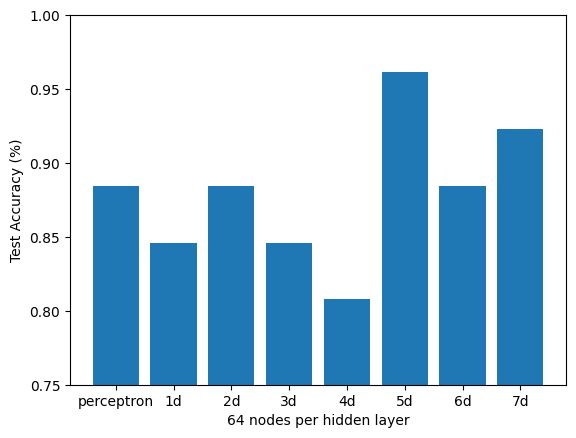

In [30]:
modelNames.insert(0, 'perceptron')
scores.insert(0, p.score(X_test, y_test) )

plt.bar(modelNames,scores)
plt.ylim(0.75, 1.0)
plt.ylabel('Test Accuracy (%)') 
plt.xlabel(str(NODES_PER_HIDDEN_LAYER) + " nodes per hidden layer")
plt.show()

In [31]:
# Assuming `models` is a list of models
for idx, model in enumerate(models):
    # Make predictions for the current model
    y_pred_model = model.predict(X_test)
    y_pred_class = np.argmax(y_pred_model, axis=1)
    print(classification_report(y_test, y_pred_class))


1/1 [==============================] - 0s 49ms/step
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        11
           1       0.79      1.00      0.88        15

    accuracy                           0.85        26
   macro avg       0.89      0.82      0.83        26
weighted avg       0.88      0.85      0.84        26

1/1 [==============================] - 0s 39ms/step
              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.83      1.00      0.91        15

    accuracy                           0.88        26
   macro avg       0.92      0.86      0.88        26
weighted avg       0.90      0.88      0.88        26

1/1 [==============================] - 0s 48ms/step
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        11
           1       0.79      1.00      0.88        15

    accuracy              